#### Part 1. 데이터 준비
- iris 데이터 준비 (구글검색  '머신러닝 iris') 
- 데이터에 대한 이해를 하고 작업함을 권장합니다.
- 구글검색 'git 모두의딥러닝3' 의 part 12 자료임

In [2]:
import pandas as pd
# 깃허브에 준비된 데이터를 가져옵니다.
 #아이리스 데이터를 불러옵니다.
df = pd.read_csv('c:/data/data/iris3.csv')

#### [추가자료임] Part 2. y값 확인
- y값에 따라서 회귀, 이항분류 시그모이드, 이항분류이상의 소프트맥스
- y값이 3개의 카테고리 중 한개를 선택하는 다항분류임으로
- Dense 층의 가장 하단(최우측)의  output은 Dense(3, activation='softmax')
- model.compile(loss='categorical_crossentropy')
- ================================================> y값이 원핫인코딩 되어 있어야함
- ================================================> y값이 숫자이지만 원핫인코딩이 안되어 있다면
-                                model.compile(loss='sparse_categorical_crossentropy')
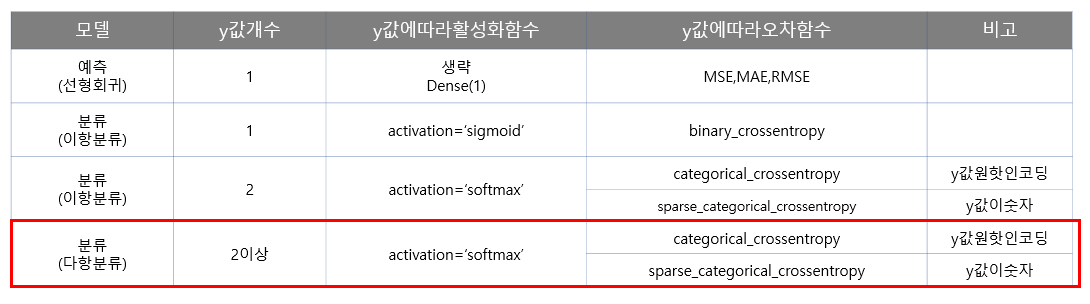

In [3]:
# 아래의 결과를 확인하염 3개의 카테고리로 되어 있음을 알수 있음
df.iloc[:,4].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [4]:
# 카테고리 갯수를 알고자 한다면
len(df.iloc[:,4].value_counts())

3

<BarContainer object of 3 artists>

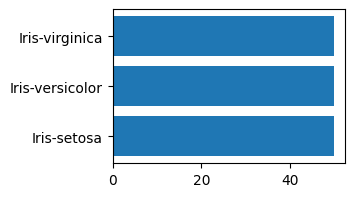

In [9]:
# 데이터의 편향없이 3개의 카테고리에 갯수가 잘 분포되어 있는지를 확인하려면
import matplotlib.pyplot as plt

tmp=df.iloc[:,4].value_counts()

plt.figure(figsize=(3,2))
plt.barh(tmp.index, tmp)   #barh는 x값라벨의 글자가 길어서 잘 안보일때 유용함

#### part3. x,y값 분리
- 머신러닝, 딥러닝의 데이터셋은 모두 숫자여야함.
- Null값 있으면 안됨

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [14]:
X=df.iloc[:, :4] 
y=df.iloc[:,4]

print(X.head())
print(y.head())




   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [21]:
# y값은 문자이면 안됨.

# 텐서플로우에서는 
# 레벨인코딩까지만 하고  model.compile(loss='sparse_categorical_crossentropy'     로 작업하면 되고(이 명령이 원핫인코딩을 수행해줌)
# 원핫인코딩 또는 더미변수화를 시키면  model.compile(loss='categorical_crossentropy'  로 작업함

# 데이터프레임이어서 더미변수명령이 가능함.. 만약 데이터프레임이 아니라면 , 레벨인코딩하고->원핫인코딩하는 작업을 진행해야함.
# 제공한 자료의 06.활성화함수_소프트맥스.pptx에서의  1-2번 슬라이드 참조
#  하단의 이미지 참조
y=pd.get_dummies(y)  
y[:3]

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False


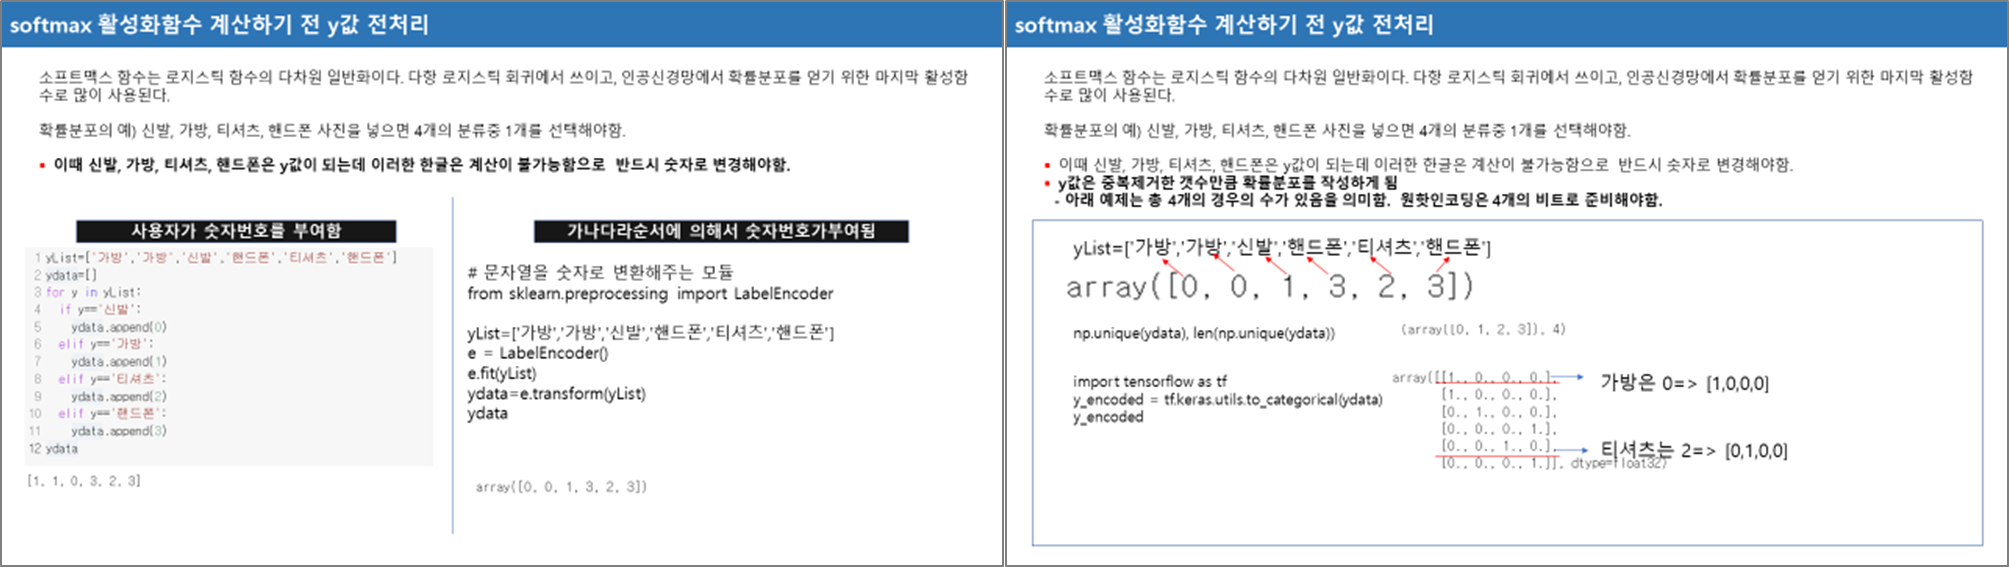

#### part4. 트레이닝, 테스트 데이터 분리
- 트레이닝 테스트 데이터를 분리하여서 훈련데이터로 w,b를 갱신하고, 테스트데이터에 w,b를 적용하여 모델의 적합성을 검증함.
- 비정형 데이터 분석에서는 트레이닝 테스트를 분리하는 사이킷런 모듈이 필요하지 않을수도 있음.
    - 비정형데이터 분석에서는 자신의 PC에 폴더별로 자료를 넣어놓으면 (예:  강아지폴더에 강아지사진... ,  고양이폴더에 고양이 사진....)
    - 텐서플로우나, 파이토치등의 딥러닝 프레임워크에서 폴더에 있는 자료에서 트레이닝과 테스트를 나누어서 불러오는 'load_directory' 기능을 제공함.
    - 이 기능을 사용하면 자동으로 폴더 이름을 이용하여서 자동으로 y값을 레벨 인코딩 까지 하면서 자료를 만듦.
    - 배치사이즈도 지정하면 그 숫자만큼 데이터를 읽어오는 기능도 제공함
    

In [24]:
from sklearn.model_selection import train_test_split
import numpy as np

# X_train, X_test, y_train, y_test 의 순서에 유의해주세요
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=777)  # 150 개중 *75%는  train.

np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test)


((112, 4), (112, 3), (38, 4), (38, 3))

#### part5. 모델제작

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 모델 설정
model = Sequential()
model.add(Dense(12,  input_dim=4, activation='relu')) # x값이4개 w(4)+b(1)=5개파람 *  12개=>60개
model.add(Dense(8,  activation='relu'))  # x값이 12개  w(12)+b(1)=13개파람 * 8개=104개
model.add(Dense(3, activation='softmax')) # x값이 8개 w(8)+b(1)=9개파람 * 3개=27개
#model.summary()

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# 에포크당 w,b를 레이어층에 맞추어서 저장
# modelpath는 폴더없으면 생성됨
from tensorflow.keras.callbacks import ModelCheckpoint
modelpath="c:/data/model/iris/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1) #verbose기본값이 0임, 1을 지정하지 않으면 결과가 화면에 출력되지 않음


# 모델 실행
# 전체112개(150개중75%의)의 데이터셋, 배치5 총 (112/5)=> 23회의 배치작업이 이루어짐. 배치23회*에포크80회=총 1840회의 optimizer='adam'작업이 이루어짐
# 배치에서는 w,b갱신만하고 총배치가 다끝나는 1에포크에서 생성된 w,b값을  validation_data에 넣어서 확인함
history=model.fit(X_train, y_train, 
                  epochs=80, 
                  batch_size=5, 
                  validation_data=(X_test, y_test),
                  callbacks=[checkpointer],
                  verbose=0)   #verbose는 기본값이 1임,  옵션값을 넣지 않으면 출력물이 화면에 보이고, verbose를 0으로 하면 출력물이 보이지 않음


Epoch 1: saving model to c:/data/model/iris\01-0.2895.hdf5

Epoch 2: saving model to c:/data/model/iris\02-0.3158.hdf5

Epoch 3: saving model to c:/data/model/iris\03-0.3158.hdf5

Epoch 4: saving model to c:/data/model/iris\04-0.3158.hdf5

Epoch 5: saving model to c:/data/model/iris\05-0.3158.hdf5

Epoch 6: saving model to c:/data/model/iris\06-0.3684.hdf5

Epoch 7: saving model to c:/data/model/iris\07-0.6579.hdf5

Epoch 8: saving model to c:/data/model/iris\08-0.7632.hdf5

Epoch 9: saving model to c:/data/model/iris\09-0.7632.hdf5

Epoch 10: saving model to c:/data/model/iris\10-0.7368.hdf5

Epoch 11: saving model to c:/data/model/iris\11-0.7632.hdf5

Epoch 12: saving model to c:/data/model/iris\12-0.7895.hdf5

Epoch 13: saving model to c:/data/model/iris\13-0.7632.hdf5

Epoch 14: saving model to c:/data/model/iris\14-0.8158.hdf5

Epoch 15: saving model to c:/data/model/iris\15-0.7895.hdf5

Epoch 16: saving model to c:/data/model/iris\16-0.7895.hdf5

Epoch 17: saving model to c:/dat

#### part6. 모델제작 시각화 
- history=model.fit 으로 실행한 명령어에 에코크당 loss율과 fit에서 지정한 accuracy가 history가 기억되어 있음

In [37]:
hist_df=pd.DataFrame(history.history)
hist_df.head()


,loss,accuracy,val_loss,val_accuracy
0,1.755857,0.321429,1.610701,0.289474
1,1.464322,0.339286,1.374504,0.315789
2,1.286322,0.339286,1.222316,0.315789
3,1.155235,0.339286,1.104759,0.315789
4,1.043834,0.339286,1.005762,0.315789


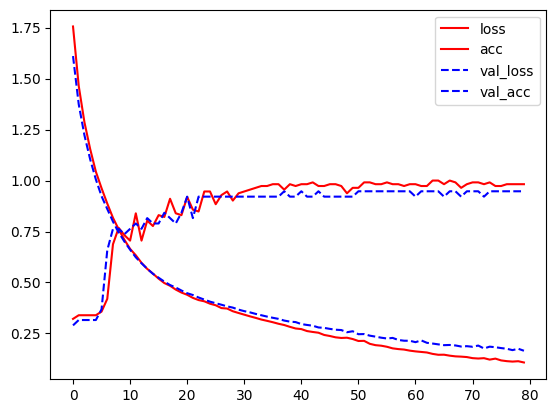

In [41]:
# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장합니다.
y_vloss=hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장합니다.
y_loss=hist_df['loss']

# x 값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시합니다.
plt.plot(hist_df['loss'],'r',label='loss')
plt.plot(hist_df['accuracy'],'r',label='acc')
plt.plot(hist_df['val_loss'],'--b',label='val_loss')
plt.plot(hist_df['val_accuracy'],'--b',label='val_acc')
plt.legend()

#### part7. 모델의 정확도를 구해봅니다.
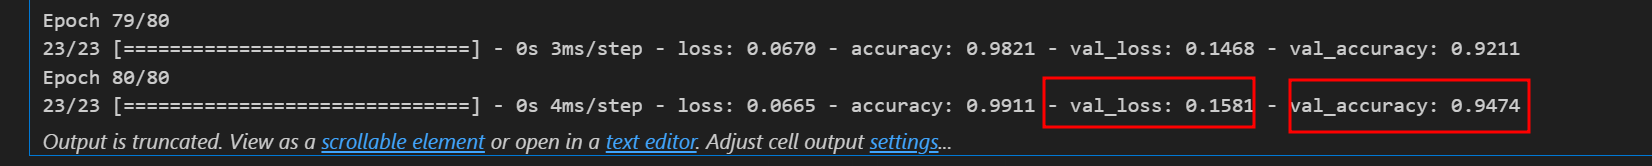

In [26]:
# model.fit할때 validation_data로 test를 사용했기 때문에 model.fit의 최종과 같은 값이 출력
score=model.evaluate(X_test, y_test)   
score # 0번은 loss, 1번은 acc

2/2 [==============================] - 0s 7ms/step - loss: 0.1581 - accuracy: 0.9474


[0.15812170505523682, 0.9473684430122375]

#### part8. 모델검증  (필수아님), Part9에서 교차검증 모델로 작업하고자함.
- Part8의 방법말고 교차검증 모델로 보통 사용함.
- 이작업은 사용자가 필요하면 함.(필수는 아님, 코드 공부하실겸)

In [60]:
len(X_test)
y_test.values[0]

array([False,  True, False])

In [62]:
model.predict(X_test)[:5]

# array([[9.9818399e-03, 9.5285404e-01, 3.7164021e-02],    가장큰값의 위치는 1번째
#        [1.7952520e-03, 9.0466195e-01, 9.3542784e-02],    가장큰값의 위치는 1번째
#        [1.1993999e-03, 7.8250211e-01, 2.1629851e-01],    가장큰값의 위치는 1번째
#        [3.7234826e-05, 2.5962135e-01, 7.4034137e-01],    가장큰값의 위치는 2번째,
#        [9.8781002e-01, 1.2184884e-02, 5.0382359e-06]], dtype=float32) ,    가장큰값의 위치는 0번째

array([[9.9818399e-03, 9.5285404e-01, 3.7164021e-02],
       [1.7952520e-03, 9.0466195e-01, 9.3542784e-02],
       [1.1993999e-03, 7.8250211e-01, 2.1629851e-01],
       [3.7234826e-05, 2.5962135e-01, 7.4034137e-01],
       [9.8781002e-01, 1.2184884e-02, 5.0382359e-06]], dtype=float32)

In [54]:
np.argmax(model.predict(X_test),axis=1)[:5]  # 함수이용해서 가장 큰값의 위치를 찾음. axis=1 옵션으로 행단위로 가장 큰값을 찾음



array([1, 1, 1, 2, 0], dtype=int64)

In [64]:
# 참고(axis 옵션)
a=np.array( [[1,2],
             [2,3],
             [3,4]])
a.sum(), a.sum(axis=1), a.sum(axis=0)

(15, array([3, 5, 7]), array([6, 9]))

In [56]:
y_test[:5]

,Iris-setosa,Iris-versicolor,Iris-virginica
71,False,True,False
86,False,True,False
90,False,True,False
83,False,True,False
6,True,False,False


In [66]:
pred_iris=np.argmax(model.predict(X_test),axis=1)
real_iris=np.argmax(y_test, axis=1) 

resultDf=pd.DataFrame({'real':real_iris, 'pred':pred_iris,'ox':real_iris==pred_iris})
resultDf[:5]

,real,pred,ox
0,1,1,True
1,1,1,True
2,1,1,True
3,1,2,False
4,0,0,True
